In [222]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap



In [223]:
def plot_with_confidence_interval(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    #calcolo l'intervallo di confidenza
    

    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

    
def plot_with_confidence_interval_log(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()
    
def plot(x_values, y_mean, color, marker, y_label, title, save_path):
    # Genera il grafico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_values, y_mean, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

# Funzione per leggere i dati e calcolare le statistiche

            
            

    

        
            

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
{1: [(1, 0.8346417666666665)], 2: [(2, 0.44961036666666665)], 3: [(3, 0.45311923333333337)], 4: [(4, 0.29507366666666673)], 5: [(5, 0.2948172333333333)], 6: [(6, 0.3056680666666667)], 7: [(7, 0.30059853333333325)], 8: [(8, 0.2293815333333334)], 9: [(9, 0.2277809333333334)], 10: [(10, 0.22691850000000002)], 11: [(11, 0.22737336666666672)], 12: [(12, 0.2284421)], 13: [(13, 0.2233869666666667)], 14: [(14, 0.2228607)], 15: [(15, 0.21957713333333334)], 16: [(16, 0.20245176666666664)], 17: [(17, 0.20517596666666665)], 18: [(18, 0.2021544666666667)], 19: [(19, 0.19871486666666666)], 20: [(20, 0.20692543333333335)], 21: [(21, 0.19613186666666665)], 22: [(22, 0.20193983333333337)], 23: [(23, 0.20542143333333335)], 24: [(24, 0.19625940000000003)]}


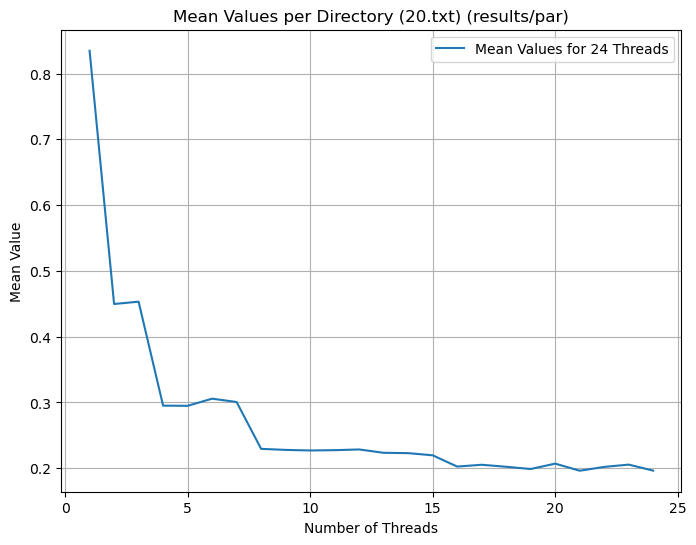

[1.8563668201304073, 1.8419914787697154, 2.8285877763857825, 2.831048094542641, 2.7305494347790327, 2.776599597514115, 3.6386615545628036, 3.664230163835777, 3.6781565481292464, 3.6707982949043707, 3.6536249958596354, 3.736304669520408, 3.7451276365311, 3.8011324494323473, 4.122669712440148, 4.0679314455120545, 4.128732747928398, 4.200197905004925, 4.033538812612529, 4.25551329751616, 4.13312100386336, 4.063070504002908, 4.252747978780462]


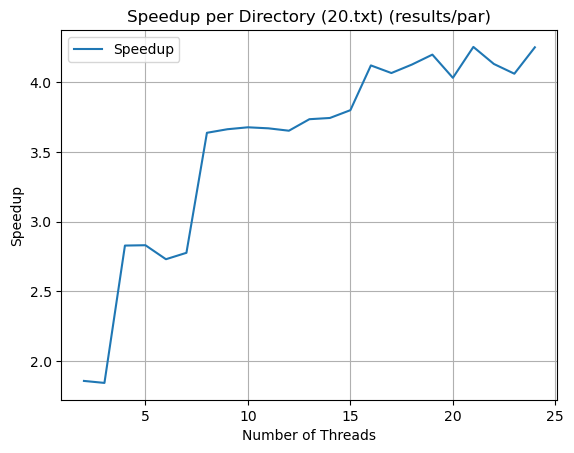

In [224]:
import os
import matplotlib.pyplot as plt

# Define the directory path
base_dir = os.path.join('results', 'par')

# Initialize an empty dictionary to store data
data = {}

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]

dirs.sort()
print(dirs)

# Loop through directories in the base directory
for dir in dirs:
  # Construct the path for the current directory
  dir_path = os.path.join(base_dir, str(dir))

  # Check if it's a directory (not a file)
  if os.path.isdir(dir_path):
    # Initialize an empty list for this directory's data
    data[dir] = []

    # Process only the "20.txt" file
    file_path = os.path.join(dir_path, '22.txt')

    # Check if the file exists
    if os.path.isfile(file_path):
      # Open the file and calculate the mean
      with open(file_path, 'r') as f:
        lines = f.readlines()
        tot = 0
        for line in lines:
          tot += float(line)
        mean = tot / len(lines)
        #print(dir, mean)

        # Append the mean value and thread count (assuming thread count is in the directory name)
        data[dir].append((dir, mean))

# Sort the data by thread count
#data = sorted(data(data.items(), key=lambda item: item[1]))
print(data)

#order on key


# Prepare the plot
plt.figure(figsize=(8, 6))

x,y = [], []

# Loop through directories and their data
for key, value in data.items():
    #print( value)
    x.append(int(value[0][0]))
    y.append(value[0][1])
  # Plot the data for this directory with a unique label
plt.plot(x, y, label=f"Mean Values for {key} Threads")

# Set labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Mean Value")
plt.title("Mean Values per Directory (20.txt) (results/par)")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#print the speedup for every thread
speedup = []
for i in range(1,len(y)):
    speedup.append(y[0]/y[i])
print(speedup)
plt.plot(x[1:], speedup, label=f"Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Speedup per Directory (20.txt) (results/par)")
plt.legend()
plt.grid(True)
plt.show()

